In [2]:
'''
Choose segment from this list:
'involved_type_hebrew'
'license_acquiring_date'
'age_group'
'age_group_hebrew'
'sex'
'sex_hebrew'
'vehicle_status_hebrew'
'vehicle_attribution_hebrew'
'seats'
'total_weight_hebrew'
'vehicle_vehicle_type_hebrew'
'vehicle_damage_hebrew'
'injury_severity_hebrew'
'injured_type_hebrew'
'injured_position_hebrew'
'''

"\nChoose segment from this list:\n'involved_type_hebrew'\n'license_acquiring_date'\n'age_group'\n'age_group_hebrew'\n'sex'\n'sex_hebrew'\n'vehicle_status_hebrew'\n'vehicle_attribution_hebrew'\n'seats'\n'total_weight_hebrew'\n'vehicle_vehicle_type_hebrew'\n'vehicle_damage_hebrew'\n'injury_severity_hebrew'\n'injured_type_hebrew'\n'injured_position_hebrew'\n"

In [3]:
segment_for_example = 'injury_severity_hebrew'

In [4]:
'''Choose timeframe from the list:
'accident_year'
'accident_month'
'accident_day'
'weekday'
'''

"Choose timeframe from the list:\n'accident_year'\n'accident_month'\n'accident_day'\n'weekday'\n"

In [5]:
timeframe_for_example = 'accident_year'

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
from bidi.algorithm import get_display
from adjustText import adjust_text
import matplotlib.gridspec as gridspec


In [7]:
# import data from csv to acc_data
sample_size = 1000000
acc_data = pd.read_csv("C://Users//user//PycharmProjects//anyway//data//views_2019//involved_markers_hebrew.csv",nrows=sample_size,low_memory=False)
#create weekday column
acc_data['weekday'] = pd.to_datetime(acc_data['accident_timestamp']).apply(lambda x: x.weekday())
#get dummies for segment
dummies = list(set(pd.get_dummies(acc_data,columns=[segment_for_example]).columns) - set(acc_data.columns))
acc_data = pd.get_dummies(acc_data,columns=[segment_for_example])
#create grouped table
acc_data = acc_data.groupby([timeframe_for_example])[dummies].sum().reset_index()
#add columns of deltas
for i in dummies:
    column_name = i + "_delta"
    acc_data[column_name] =acc_data[i].pct_change(+1).round(2)
    acc_data[column_name] = acc_data[column_name].apply(lambda x: "{0:.0f}%".format(x*100))
    
#change labels to hebrew
dummies_heb = []
for label in dummies:
    dummies_heb.append(get_display(label))




<Figure size 432x288 with 0 Axes>

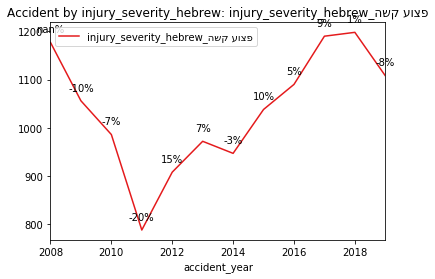

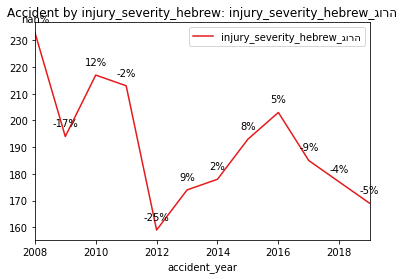

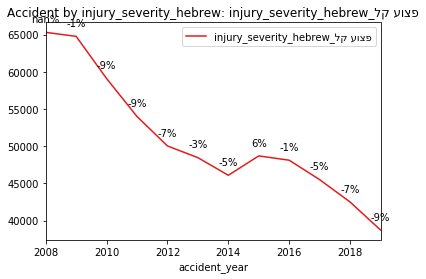

In [8]:
#plot line
#create labels

fig = plt.figure()
j = 0
for i in dummies:
    acc_data.plot(x=timeframe_for_example,y=i,kind="line",label = dummies_heb[j],cmap = 'Set1')
    for x,y,z in zip(acc_data[timeframe_for_example],acc_data[i],acc_data[i+"_delta"]):
        label = z
        
        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center',# horizontal alignment can be left, right or center
                     )#fontsize = 10)
    
    plt.title("Accident by "+ segment_for_example + ": " + dummies_heb[j])
    j+=1
